<img src='../../../images/wcd_logo.png' width='50%'>
-------------

<center> <h1> Python for Data Science </h1> </center>
<br>
<center><h2> Assignment 3: SciPy </h2> </center>

<br>
<center align="left"> Developed by: </center>
<center align="left"> WeCloudData Academy </center>



----------

## Part 1: Sparse Matrices

**Question 1**: 

Create two random sparse matrices, x and y. The first one must have 1000 rows and 1000 columns and should contain the value 0.99 along the diagonal and 0 everywhere else. The second one should have 1000 rows and 500 columns. Assign random numbers between 50 and 100 to 20% of the values within this matrix. The remaining 80% of the values should be zero. (Hint: look at the scipy.sparse.rand function)

Then do a matrix multiplication of x and y, and store the result in a new variable, z

In [40]:
import numpy as np

# Compressed Sparse Row matrix
from scipy.sparse import csr_matrix
from scipy.sparse import rand

x = csr_matrix(0.99*(np.eye(1000)))

#for random numbers in interval [a,b] for matrix p, we perform: (b - a)*p + a*p.ceil()
y = rand(1000, 500, density=0.20, format="csr")
y = (100-50)*y + 50*y.ceil()
z = x * y
z

<1000x500 sparse matrix of type '<class 'numpy.float64'>'
	with 100000 stored elements in Compressed Sparse Row format>

**Question 2**: 

Find out how many rows and columns are in the new matrix z, calculted in question 1. Is it what you would expect

In [41]:
z.shape

(1000, 500)

Yes, that's what I expected as multiplying two matrices of (1000 x 1000) and (1000 x 500) dimenions will give a matrix of (1000 x 500) dimensions.

**Question 3**:

Calculate the determinant and Frobenius norm of x

In [42]:
from scipy import linalg
import math
from scipy.linalg import norm

print ('The determinant of x is: ', linalg.det(x.todense()), ' and Frobenius of x is:', norm(x.todense()))

The determinant of x is:  4.317124741065784e-05  and Frobenius of x is: 31.3065488357


**Question 4**:

Create a matrix with 1000 rows and 1500 columns by joining the matrices x and y at the side into one matrix

In [43]:
from scipy import sparse
sparse.hstack((x,y))

<1000x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 101000 stored elements in COOrdinate format>

## Part 2: Stats in Scipy

In [44]:
from scipy import stats
import numpy as np

**Question 5**:
Create two samples of 1000 numbers each. The first should be from a standard normal distribution (i.e. mean 0 and standard deviation of 1) and the second should be from a normal distribution with mean 10 and standard distribution 3.

Do a t-test on these two datasets. Is the result what you would expect?

In [75]:
import numpy as np

#standard normal distribution
sample1 = np.random.standard_normal(1000)


#normal disribution with mean 10 and standard deviation 3
sample2 = np.random.normal(10, 3, 1000)


In [76]:
from scipy import stats
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-97.466413946853166, pvalue=0.0)

**Question 6:** 
Use Plotly to plot histograms of the two distributions you just created. The histograms for each should be on the same plot.

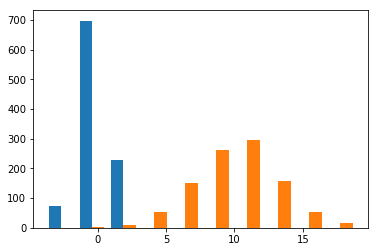

In [77]:
import matplotlib.pyplot as plt
hist_data = [sample1,sample2]
plt.close()   # to clear any previous plots if running with new samples
plt.hist(hist_data)
fig = plt.gcf()
fig